# Hotel Booking Demand

### Andri Rifky,JCDS 1804 Jakarta



## Business Problem Understanding

**Context**  
Sebuah hotel ingin menyiapkan kamar untuk calon pelanggannya. dari catatan yang ada, hotel ingin mengetahui pelanggan mana yang akan benar - benar menginap dan mana yang tidak.


Target :

0 : Tidak membatalkan booking

1 : Membatalkan Booking

**Problem Statement :**

Proses penyiapan fasilitas seperti kamar pada hotel memakan waktu dan sumber daya. Jika hotel menyiapkan semua fasilitas tetapi tidak digunakan maka akan sia - sia dan hotel dapat merugi.Sedangkan beberapa fasilitas hotel kualitasnya akan menurun tiap waktu (contoh: makanan pada restaurant), sehingga fasilitas harus disiapkan disaat diminta.

**Goals :**

Maka berdasarkan permasalahan tersebut, hotel ingin memiliki kemampuan untuk memprediksi faktor - faktor apa saja yang membuat pelanggan membatalkan booking, sehingga dapat memfokuskan penyiapan fasilitas pada pelanggan yang akan menginap dihotel tersebut. 

Dan juga, jika hotel memiliki pelanngan dalam waiting list , mereka dapat memprioritaskan pelanggan yang tidak dalam kriteria pelanggan yang mebatalkan booking.


**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pengunjung yang jadi menginap di hotel dan yang tidak jadi(batal).

Kemudian kita akan membangun model klasifikasi yang akan membantu hotel untuk dapat memprediksi probabilitas pengunjung yang akan menginap atau tidak.

![title](picture.jpg)

Type 1 error : False Positive  
Konsekuensi: Kehilangan pengunjung, menurunkan reputasi hotel

Type 2 error : False Negative  
Konsekuensi: Sia-sia sumber daya untuk persiapan fasilitas

In [1]:
import pandas as pd
import numpy as np

import seaborn as snis
import matplotlib.pyplot as mpl

In [2]:
df=pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


# Data reading

cek unique

In [3]:
df['country'].unique()

array(['IRL', 'FRA', 'PRT', 'NLD', 'ESP', 'UMI', 'CN', 'LUX', 'BRA',
       'BEL', 'JPN', 'DEU', 'ITA', 'CHE', 'GBR', 'AGO', 'SRB', 'COL',
       'CHN', 'SWE', 'AUT', 'CIV', 'CZE', 'POL', 'USA', 'SGP', 'RUS',
       'ROU', 'DNK', 'IND', 'MAR', 'PHL', 'ARG', 'ISL', 'ZAF', 'LBN',
       'MOZ', 'TUR', 'BGD', 'MEX', 'CAF', 'NOR', 'FIN', 'UKR', 'EGY',
       'ISR', nan, 'KOR', 'AZE', 'HUN', 'AUS', 'EST', 'CHL', 'SVN', 'PRY',
       'ABW', 'ALB', 'LTU', 'ARE', 'HRV', 'SAU', 'NZL', 'LVA', 'ATA',
       'KAZ', 'DZA', 'TWN', 'CRI', 'BIH', 'BGR', 'IRQ', 'OMN', 'VEN',
       'IDN', 'GEO', 'MLT', 'IRN', 'BLR', 'URY', 'LBY', 'TUN', 'BEN',
       'MYS', 'MWI', 'GRC', 'CYP', 'CPV', 'HKG', 'PRI', 'MKD', 'MUS',
       'IMN', 'PAN', 'NGA', 'GLP', 'KHM', 'PER', 'QAT', 'SEN', 'MAC',
       'SVK', 'BHR', 'ECU', 'SYC', 'BOL', 'TJK', 'LCA', 'MDV', 'SYR',
       'ZMB', 'LIE', 'THA', 'MNE', 'BRB', 'CMR', 'JEY', 'GTM', 'LKA',
       'JOR', 'TZA', 'AND', 'ARM', 'GIB', 'VNM', 'PAK', 'JAM', 'DOM',
       'KWT', 'L

In [4]:
df['reserved_room_type'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

In [5]:
df['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

In [6]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [7]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[NLD, DMA]"
1,market_segment,object,0,0.00,8,"[Direct, Aviation]"
2,previous_cancellations,int64,0,0.00,15,"[19, 25]"
3,booking_changes,int64,0,0.00,19,"[7, 17]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[122, 64]"
6,customer_type,object,0,0.00,4,"[Transient, Contract]"
7,reserved_room_type,object,0,0.00,10,"[B, C]"
8,required_car_parking_spaces,int64,0,0.00,5,"[0, 3]"
9,total_of_special_requests,int64,0,0.00,6,"[4, 1]"


In [8]:
# summary
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


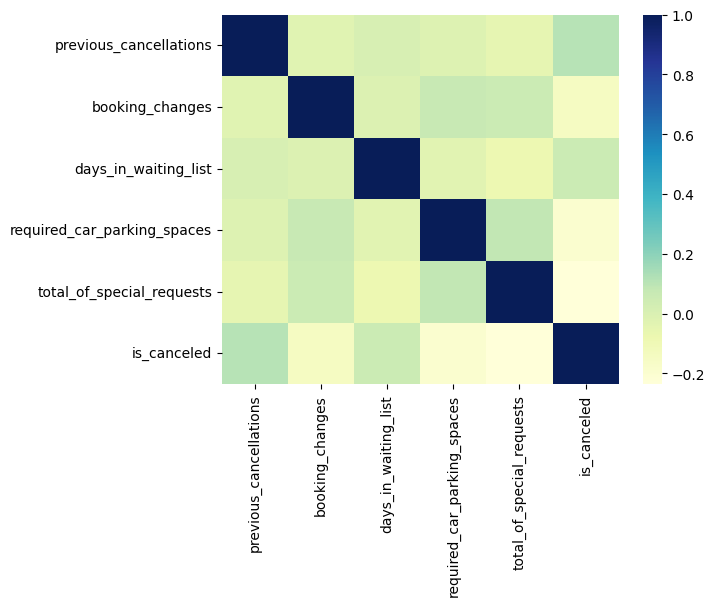

In [9]:
# heatmap for the corelation matrix
snis.heatmap(df.corr(),cmap='YlGnBu')
mpl.show()

In [10]:
# Checking for missing values
df.isnull().sum()[df.isnull().sum()>0]
# Data has missing values

country    351
dtype: int64

In [11]:
# Checking for class imbalance in the target variable
df.is_canceled.value_counts()


0    52795
1    30778
Name: is_canceled, dtype: int64

In [12]:
(df['is_canceled'].value_counts()/len(df))*100

0    63.172316
1    36.827684
Name: is_canceled, dtype: float64

# Data cleaning

In [13]:
# Format Kolom agar sedikit rapih
df.columns = [s.strip().replace('_',' ') for s in df.columns]

In [14]:
# cek missing value
df.isna().sum()

country                        351
market segment                   0
previous cancellations           0
booking changes                  0
deposit type                     0
days in waiting list             0
customer type                    0
reserved room type               0
required car parking spaces      0
total of special requests        0
is canceled                      0
dtype: int64

In [15]:
df['country'].isna().sum()/len(df)*100
# jumlah nan hanya sekita 0,4% dari keseluruhan data

0.4199921027125986

terdapat missing value sebanyak 351 pada kolom country. karena tidak bisa melakukan dari kolom lain, maka akan di drop
karena jumlah data dibawah 1% maka di drop saja.

In [16]:
df=df.dropna()

In [17]:
df.isna().sum()

country                        0
market segment                 0
previous cancellations         0
booking changes                0
deposit type                   0
days in waiting list           0
customer type                  0
reserved room type             0
required car parking spaces    0
total of special requests      0
is canceled                    0
dtype: int64

In [18]:
df

,country,market segment,previous cancellations,booking changes,deposit type,days in waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


## Data Preprocessing

beberapa kolom akan di binning
seperti:
1. previous cancellations:  0: tidak pernah membatalkan pesanan
                            1: pernah membatalkan
1. booking changes: 0: tidak pernah merubah pesanan
                    1: pernah merubah pesanan
1. deposit type 0: tidak membayar uang muka(deposit)
                1: membayar uang muka (deposit)
1. days in waiting list:    0: tidak dalam waiting list
                            1: dalam waiting list

In [19]:
# binning
df['previous cancellations'] = df['previous cancellations'].apply(lambda x: 0 if x == 0 else 1)
df['booking changes'] = df['booking changes'].apply(lambda x: 0 if x == 0 else 1)
df['deposit type'] = df['deposit type'].apply(lambda x: 0 if x == 'No Deposit' else 1)
df['days in waiting list'] = df['days in waiting list'].apply(lambda x: 0 if x == 0 else 1)

C:\Users\Andri\AppData\Local\Temp\ipykernel_15072\1284573064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous cancellations'] = df['previous cancellations'].apply(lambda x: 0 if x == 0 else 1)
C:\Users\Andri\AppData\Local\Temp\ipykernel_15072\1284573064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking changes'] = df['booking changes'].apply(lambda x: 0 if x == 0 else 1)
C:\Users\Andri\AppData\Local\Temp\ipykernel_15072\1284573064.py:4: SettingWithCopyWarning: 
A value is tryin

In [20]:
# Merubah beberapa nama kolom
df.rename(columns={'deposit type': 'deposit','previous cancellations':'ever cancel','booking changes':'book change','days in waiting list':'waiting list'},inplace=True)

C:\Users\Andri\AppData\Local\Temp\ipykernel_15072\3096130523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'deposit type': 'deposit','previous cancellations':'ever cancel','booking changes':'book change','days in waiting list':'waiting list'},inplace=True)


In [21]:
# Corelation matrix
df.corr()

,ever cancel,book change,deposit,waiting list,required car parking spaces,total of special requests,is canceled
ever cancel,1.000000,-0.073233,0.320530,0.122795,-0.042837,-0.111079,0.270440
book change,-0.073233,1.000000,-0.141561,-0.016941,0.077560,0.050778,-0.187051
deposit,0.320530,-0.141561,1.000000,0.234104,-0.093524,-0.268821,0.477335
waiting list,0.122795,-0.016941,0.234104,1.000000,-0.041194,-0.114276,0.101384
required car parking spaces,-0.042837,0.077560,-0.093524,-0.041194,1.000000,0.084088,-0.194110
total of special requests,-0.111079,0.050778,-0.268821,-0.114276,0.084088,1.000000,-0.237001
is canceled,0.270440,-0.187051,0.477335,0.101384,-0.194110,-0.237001,1.000000


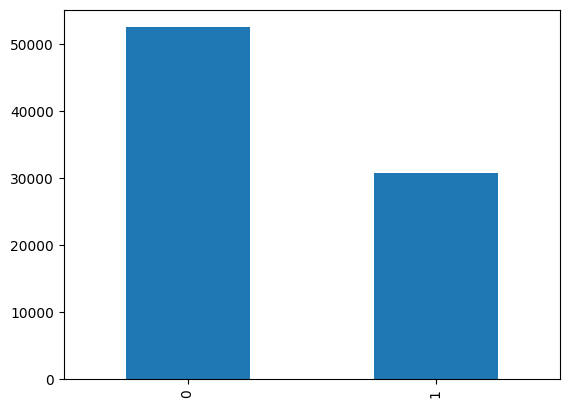

In [171]:
df['is canceled'].value_counts().plot.bar()
mpl.show()

In [23]:
df

,country,market segment,ever cancel,book change,deposit,waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,0,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,0,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,0,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,0,0,Transient,A,0,1,1
4,PRT,Online TA,0,1,0,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,0,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,0,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,0,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,0,0,Transient-Party,A,0,0,0


## EDA

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [25]:
#encoding
transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['customer type']),
    ('binary',ce.BinaryEncoder(),['country','reserved room type','market segment'])
],remainder='passthrough')

In [26]:
x=df.drop(columns='is canceled')
y=df['is canceled']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2020)

In [28]:
transformer.fit_transform(x)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 0., 0., 2.],
       ...,
       [0., 1., 0., ..., 0., 0., 3.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Modelling

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
logreg=LogisticRegression(max_iter=150,random_state=2020)
tree=DecisionTreeClassifier(max_depth=4,random_state=2020)
knn=KNeighborsClassifier(n_neighbors=4)
forest=RandomForestClassifier(max_depth=4,random_state=2020)
ada=AdaBoostClassifier(tree,n_estimators=150,learning_rate=0.1,random_state=2020)
gbc=GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,max_depth=4,random_state=2020)
xgb=XGBClassifier(n_estimators=150,learning_rate=0.1,max_depth=4,random_State=2020)

# Model selection

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [32]:
models=[logreg,tree,knn,forest,ada,gbc,xgb]
score=[]
rata=[]
std=[]
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocessing',transformer),
        ('model',i)
    ])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

d:\Dev\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Dev\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

[08:55:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_State" } are not used.

[08:55:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_State" } are not used.

[08:55:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_State" } are not used.

[08:55:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_State" } are not used.

[08:55:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_State" } are n

In [33]:
pd.DataFrame({'models':models,'score':score,'rata rata':rata,'standar deviasi':std})

,models,score,rata rata,standar deviasi
0,"LogisticRegression(max_iter=150, random_state=...","[0.6472690148034712, 0.647377938517179, 0.6456...",0.650492,0.006978
1,"DecisionTreeClassifier(max_depth=4, random_sta...","[0.5373181530676787, 0.5489642184557438, 0.534...",0.543074,0.005769
2,KNeighborsClassifier(n_neighbors=4),"[0.6880679806443999, 0.6696600384862093, 0.654...",0.668697,0.011025
3,"RandomForestClassifier(max_depth=4, random_sta...","[0.5371482769522605, 0.5454831602140384, 0.532...",0.541691,0.005915
4,AdaBoostClassifier(base_estimator=DecisionTree...,"[0.7225167089191058, 0.7302933088909259, 0.725...",0.722771,0.009749
5,"GradientBoostingClassifier(max_depth=4, n_esti...","[0.7138586631591535, 0.7208837701257491, 0.708...",0.713894,0.006477
6,"XGBClassifier(base_score=None, booster=None, c...","[0.7140811455847256, 0.7208455666470934, 0.709...",0.713409,0.009624


In [34]:
pd.DataFrame({
    'model':['logreg','tree','knn','forest','ada','gbc','xgb'],
    'mean':rata,
    'std':std
})

,model,mean,std
0,logreg,0.650492,0.006978
1,tree,0.543074,0.005769
2,knn,0.668697,0.011025
3,forest,0.541691,0.005915
4,ada,0.722771,0.009749
5,gbc,0.713894,0.006477
6,xgb,0.713409,0.009624


dari hasil CV, mean tertinggi adalah adaboost, sedangkan std terendah adalah tree. karena mayoritas std 0.01, maka akan dipilih dengan mean tertinggi

# Model test

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

sesuai hasil diatas, maka model yang dipilih yaitu top 2 mean 
1. ada
1. gbc


In [36]:
model={
    'gbc': GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,max_depth=4,random_state=2020),
    'ada': AdaBoostClassifier(tree,n_estimators=150,learning_rate=0.1,random_state=2020),
}

gbc
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     13123
           1       0.78      0.67      0.72      7683

    accuracy                           0.81     20806
   macro avg       0.80      0.78      0.79     20806
weighted avg       0.81      0.81      0.80     20806



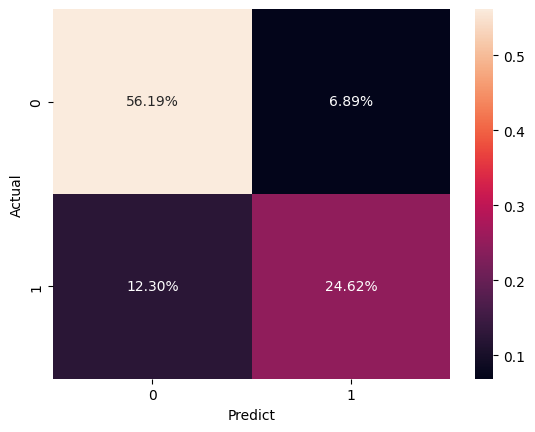

ada
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     13123
           1       0.77      0.69      0.73      7683

    accuracy                           0.81     20806
   macro avg       0.80      0.79      0.79     20806
weighted avg       0.81      0.81      0.81     20806



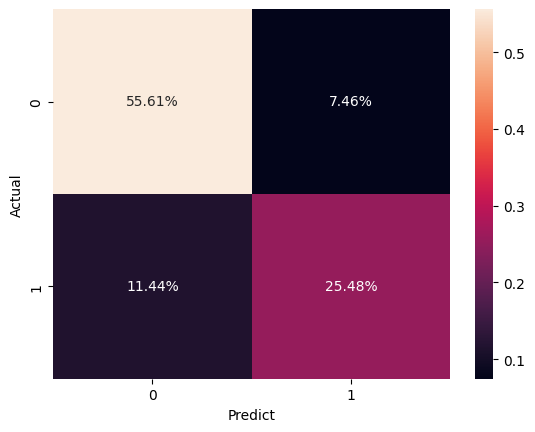

tree
              precision    recall  f1-score   support

           0       0.73      1.00      0.85     13123
           1       0.99      0.38      0.55      7683

    accuracy                           0.77     20806
   macro avg       0.86      0.69      0.70     20806
weighted avg       0.83      0.77      0.73     20806



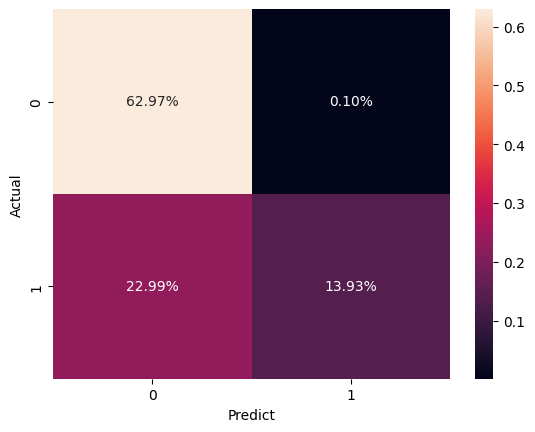

foerst
              precision    recall  f1-score   support

           0       0.73      1.00      0.85     13123
           1       0.99      0.38      0.55      7683

    accuracy                           0.77     20806
   macro avg       0.86      0.69      0.70     20806
weighted avg       0.83      0.77      0.73     20806



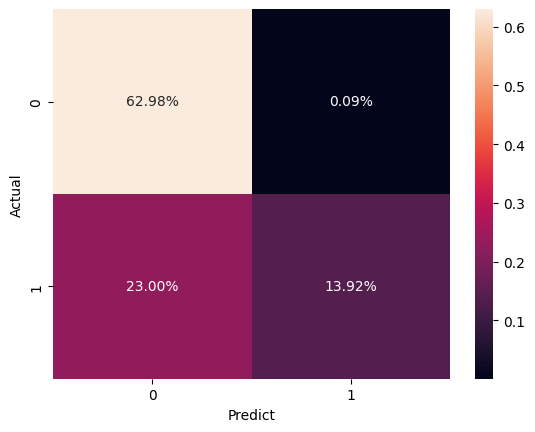

In [37]:
for i,j in model.items():
    estimator=Pipeline([
    ('preprocessing',transformer),
    ('model',j)
    ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))
    snis.heatmap(confusion_matrix(y_test,y_pred)/np.sum(confusion_matrix(y_test,y_pred)),annot=True,fmt='.2%')
    mpl.xlabel('Predict')
    mpl.ylabel('Actual')
    mpl.show()



In [38]:
tunning_models=[ada,gbc]
for model in tunning_models: 
    estimator=Pipeline([
        ('processing',transformer),
        ('model',model)
])

In [40]:
hyperparam=[
    {'model':[ada],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200]},
    {'model':[ada],
    'model__learning_rate':[0.01],
    'model__n_estimators':[500]},
    {'model':[ada],
    'model__learning_rate':[0.001],
    'model__n_estimators':[1000]},
    {'model':[gbc],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200]},
    {'model':[gbc],
    'model__learning_rate':[0.01],
    'model__n_estimators':[500],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.001],
    'model__n_estimators':[1000],
    'model__max_depth':[1,2,3,4,5]},
    
]

In [41]:
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator,
                 param_grid=hyperparam,
                 cv=skfold,
                 scoring='f1',
           n_jobs=-1)

In [42]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['customer '
                                                                          'type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['country',
                                                                          'reserved '
                                                                          'room '
                                                                          'type',
                                                                          'market '
                                                                          'segment'])])),
                                       ('model',
                                        RandomForestClassifier(max_d...
                         {'model': [GradientBoostingClassifier(max_depth=4,
                                                               n_estimators=150,
                                                               random_state=2020)],
                          'model__learning_rate': [0.01],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [500]},
                         {'model': [GradientBoostingClassifier(max_depth=4,
                                                               n_estimators=150,
                                                               random_state=2020)],
                          'model__learning_rate': [0.001],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [1000]}],
             scoring='f1')

In [43]:
print('best score',grid.best_score_)
print ('best param', grid.best_params_)

best score 0.7250091615747044
best param {'model': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=2020),
                   learning_rate=0.1, n_estimators=200, random_state=2020), 'model__learning_rate': 0.1, 'model__n_estimators': 200}


In [44]:
pd.set_option ('display.max_rows', None)
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')[['mean_fit_time', 'params','mean_test_score','std_test_score','rank_test_score']]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score
0,57.983940,{'model': AdaBoostClassifier(base_estimator=De...,0.725009,0.006111,1
3,46.578767,{'model': GradientBoostingClassifier(max_depth...,0.715187,0.008489,2
8,145.215378,{'model': GradientBoostingClassifier(max_depth...,0.704177,0.011065,3
1,128.586891,{'model': AdaBoostClassifier(base_estimator=De...,0.696132,0.011089,4
7,121.989879,{'model': GradientBoostingClassifier(max_depth...,0.690092,0.007423,5
6,98.551350,{'model': GradientBoostingClassifier(max_depth...,0.660969,0.008835,6
2,264.291470,{'model': AdaBoostClassifier(base_estimator=De...,0.658158,0.060416,7
5,65.971302,{'model': GradientBoostingClassifier(max_depth...,0.595792,0.010695,8
13,200.603351,{'model': GradientBoostingClassifier(max_depth...,0.545281,0.005808,9
12,238.756283,{'model': GradientBoostingClassifier(max_depth...,0.541191,0.006105,10


## Before vs After Tuning

In [173]:
# Before tuning
ada=AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=2020)
estimator=Pipeline([
    ('processing',transformer),
    ('model',ada)
])
estimator.fit(x_train,y_train)
y_pred_before=estimator.predict(x_test)

# After tuning
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_after=best_model.predict(x_test)

In [176]:
before_tuning=classification_report(y_test,y_pred_before)
after_tuning=classification_report(y_test,y_pred_after)

In [178]:
print(f'Before Tuning \n',before_tuning)
print(f'After Tuning \n',after_tuning)

Before Tuning 
               precision    recall  f1-score   support

           0       0.76      0.95      0.85     13123
           1       0.85      0.50      0.63      7683

    accuracy                           0.78     20806
   macro avg       0.81      0.72      0.74     20806
weighted avg       0.80      0.78      0.76     20806

After Tuning 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85     13123
           1       0.77      0.69      0.73      7683

    accuracy                           0.81     20806
   macro avg       0.80      0.79      0.79     20806
weighted avg       0.81      0.81      0.81     20806



## Feature Importances


In [58]:
best_model

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country',
                                                   'reserved room type',
                                                   'market segment'])])),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                          random_state=2020),
                                    learning_rate=0.1, n_estimators=200,
                                    random_state=2020))])

In [117]:
# feature
best_model[0].transformers_[0][1].get_feature_names_out()

array(['customer type_Group', 'customer type_Transient',
       'customer type_Transient-Party'], dtype=object)

In [138]:
best_model[0].transformers_[1][1].get_feature_names()

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'reserved room type_0',
 'reserved room type_1',
 'reserved room type_2',
 'reserved room type_3',
 'market segment_0',
 'market segment_1',
 'market segment_2',
 'market segment_3']

In [155]:
x.columns[best_model[0].transformers_[2][2]]

Index(['ever cancel', 'book change', 'deposit', 'waiting list',
       'required car parking spaces', 'total of special requests'],
      dtype='object')

In [156]:
feature=list(best_model[0].transformers_[0][1].get_feature_names_out())+list(best_model[0].transformers_[1][1].get_feature_names())+list(x.columns[best_model[0].transformers_[2][2]])

In [159]:
#feature importance
pd.DataFrame({'imp':best_model[1].feature_importances_},index=feature).sort_values('imp',ascending=False).head()

,imp
total of special requests,0.098231
market segment_2,0.092373
country_5,0.081195
country_6,0.073401
country_4,0.066104


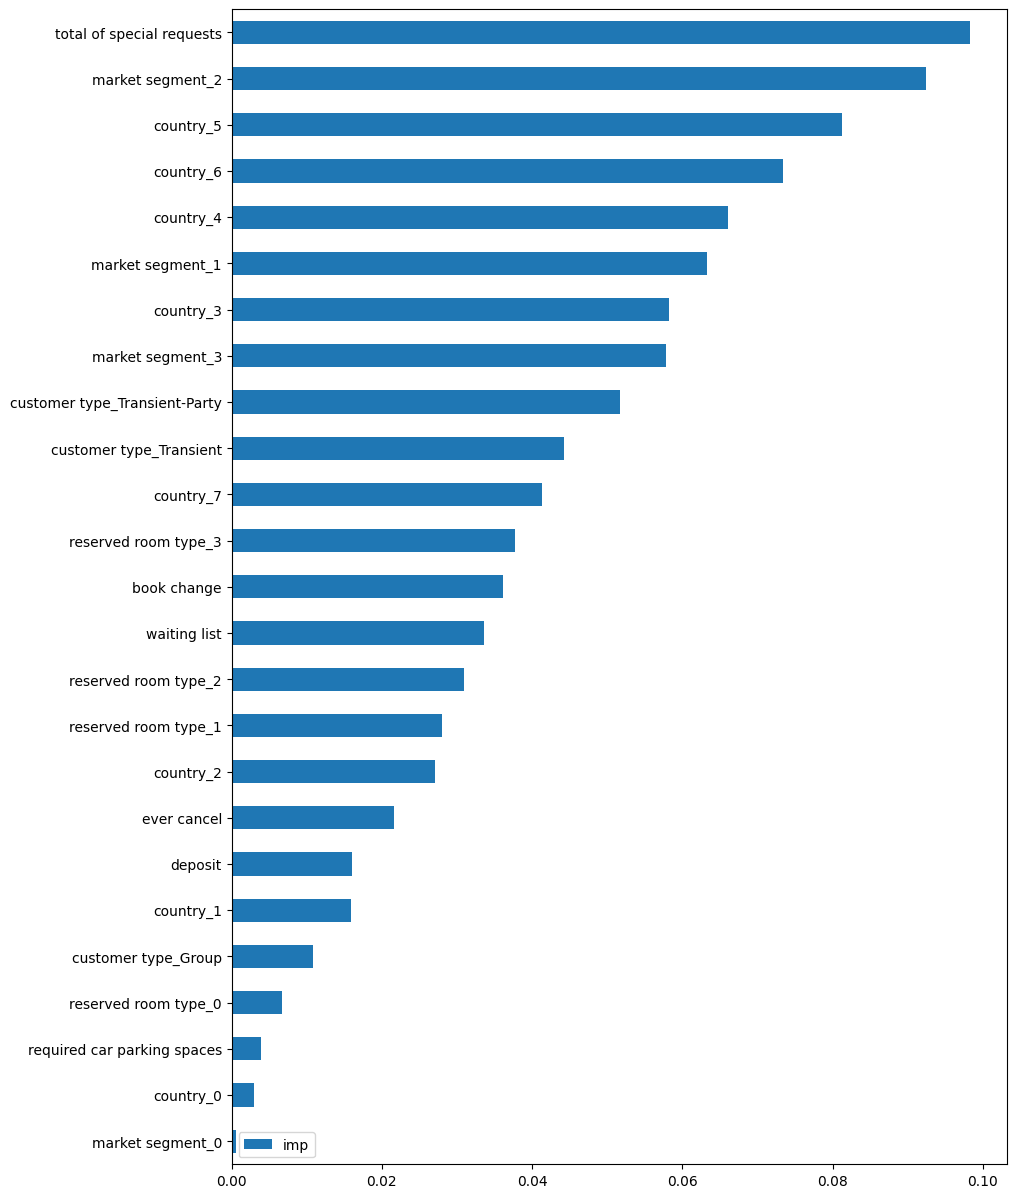

In [160]:
#visualisasi
pd.DataFrame({'imp':best_model[1].feature_importances_},index=feature).sort_values('imp',ascending=True).plot(kind='barh',figsize=(10,15))
mpl.show()